## Libraries

In [1]:
# !pip install lpips
# !pip install opencv-python

In [43]:
gray

## Load Image

In [3]:
img = cv2.imread("/Users/veda/Downloads/Veda_img.jpg",)
# image = Image.open("sample_image_assignment_1_cv.jpg")
# img is an array

## Transformations

In [4]:
# Convert to colour
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [5]:
# Image size
print(f"Image Shape: {img.shape}")

Image Shape: (1198, 1600, 3)


In [6]:
# Resize image
img=cv2.resize(img,(512,512))

# def image_resize(img,size):
#     try:
#         resized_img = img.resize(size)
#         return resized_img
#     except Exception as e:
#         print(f"Error: {e}")

# new_resize = (512,512)
# image = image_resize(image,new_resize)

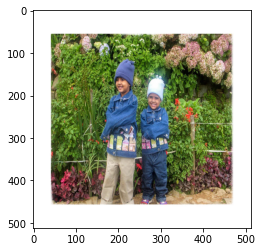

In [7]:
# View image
plt.imshow(img)
# plt.show()

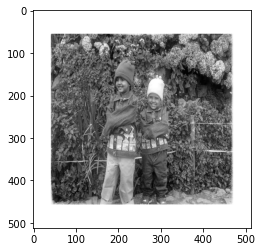

In [8]:
# Convert to gray image
bnwimg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(bnwimg,cmap="gray")

# def convert_to_grayscale(img):
#     try:
#         ##Convert the image to grayscale
#         grayscale_img = img.convert('L')
#         return grayscale_img
#     except Exception as e:
#         print(f"Error: {e}")
        
# image = convert_to_grayscale(image)
# plt.title("Gray-Scaled Version")
# plt.imshow(image)
# plt.show()

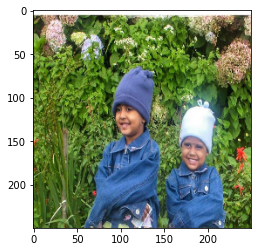

In [9]:
# Crop image
crop=img[50:300,100:350]
plt.imshow(crop)


# def crop_image(image, top, left, bottom, right):
#     ##Convert the image to a numpy array
#     img_array = np.array(image)

#     ##Perform cropping using array slicing
#     cropped_image = img_array[top:bottom, left:right]

#     return Image.fromarray(cropped_image)

# top = 50
# left = 245
# bottom = 300
# right = 400

# cropped_image = crop_image(image, top, left, bottom, right)

# plt.figure(figsize=(8, 4))

# plt.subplot(1, 2, 1)
# plt.imshow(original_image)
# plt.title('Original Image')

# plt.subplot(1, 2, 2)
# plt.imshow(cropped_image)
# plt.title('Cropped Image')

# plt.show()

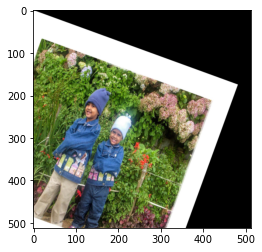

In [10]:
# Rotate image
angle=np.radians(20)
dim=np.float32([[np.cos(angle), -(np.sin(angle)), 0],[np.sin(angle), np.cos(angle), 0],[0, 0, 1]])

rotate= cv2.warpPerspective(img, dim, (int(512),int(512)))
plt.imshow(rotate)

# def rotate_image(image, angle):
#     """
#     Rotate an image using NumPy.

#     Parameters:
#     - image: NumPy array representing the image.
#     - angle: Rotation angle in degrees.

#     Returns:
#     - rotated_img_array: NumPy array representing the rotated image.
#     """
#     try:
#         # Rotate the image using NumPy
#         rotated_img_array = np.array(image.rotate(angle))

#         return rotated_img_array

#     except Exception as e:
#         print(f"Exception: {e}")
#         return None
    
# rotated_image_90 = rotate_image(image, 90)
# rotated_image_45 = rotate_image(image, 45)
# rotated_image_135 = rotate_image(image, 135)
# plt.figure(figsize=(10, 9))

# plt.subplot(1, 4, 1)
# plt.imshow(image)
# plt.title("Original")
# plt.axis("off")

# plt.subplot(1, 4, 2)
# plt.imshow(rotated_image_90)
# plt.title(f"Rotated {90} degrees")
# plt.axis("off")

# plt.subplot(1, 4, 3)
# plt.imshow(rotated_image_45)
# plt.title(f"Rotated {45} degrees")
# plt.axis("off")

# plt.subplot(1, 4, 4)
# plt.imshow(rotated_image_135)
# plt.title(f"Rotated {135} degrees")
# plt.axis("off")

# plt.show()

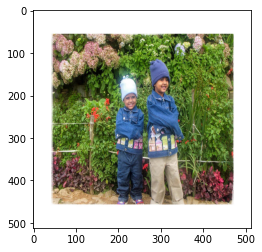

In [11]:
# Flip image
flip_dim = np.float32([[-1,  0, 512],
                [0, 1, 0],
                [0,  0, 1   ]])

flip = cv2.warpPerspective(img,flip_dim,(512,512))
plt.imshow(flip)


# def flip_image(image):
#     """
#     Convert an image to Flipped Versions.

#     Parameters:
#     - img: Input image file
    
#     Returns:
#     Fliped versions of an image [horizonatal and Vertical]
#     """
#     try:
#         ##Converting Images into an array
#         img_array = np.array(image)
#         ##Creating an vertical and horizontal Copies of the Image
#         hr_flip = img_array[:,::-1]
#         vr_flip = img_array[::-1,:]
        
#         ##Plotting the Image
#         plt.figure(figsize=(10, 3))

#         plt.subplot(1, 3, 1)
#         plt.imshow(img_array)
#         plt.title("Original")
#         plt.axis("off")

#         plt.subplot(1, 3, 2)
#         plt.imshow(hr_flip)
#         plt.title("Horizontally Flipped")
#         plt.axis("off")

#         plt.subplot(1, 3, 3)
#         plt.imshow(vr_flip)
#         plt.title("Vertically Flipped")
#         plt.axis("off")

#         plt.show()
        
#     except e:
#         print(f"Exception: {e}")

# flip_image(image)

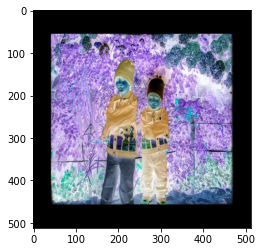

In [12]:
# Negative
negative=abs(255-img)
plt.imshow(negative)

# plt.imshow(np.array(image)[:, ::-1])

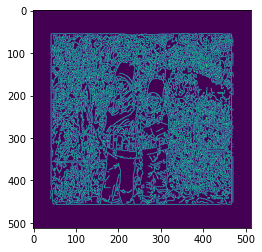

In [13]:
# Edge Detection
blur_img = cv2.GaussianBlur(img, (3,3),0)
edge_det = cv2.Canny(image = blur_img, threshold1=80, threshold2=150)
plt.imshow(edge_det)

In [ ]:
# Filtering and Blurring
def apply_filter(image, kernel):
    """
    Applying an Blur effect to the input image

    Parameters:
    - image: NumPy array representing the image.
    - kernel: Numpy array for the kernel representations

    Returns:
    - NumPy array representing the blured image.
    """
    ## Convert the image to an array
    img_array = np.array(image)

    ##Appling the convolution operation on the image
    result = convolve2d(img_array, kernel, mode='same', boundary='symm')

    ##Return the Blurred Image
    return Image.fromarray(result.astype(np.uint8))


##Define a 5x5 averaging filter kernel for blurring
blur_kernel = np.ones((5, 5), dtype=np.float32) / 25.0

##Appling the filter to the image
blurred_image = apply_filter(image, blur_kernel)


##Display the original and filtered images
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image)
plt.title('Blurred Image')

plt.show()

In [ ]:
# Normalizing
def normalize_image(image):
    """
    Applying an Normalization to the input image

    Parameters:
    - image: NumPy array representing the image.

    Returns:
    - NumPy array representing the normalized image.
    """
    ##Converting the image to a numpy array
    img_array = np.array(image)

    ##Normalize pixel values to the range [0-1]
    normalized_image = img_array / 255.0

    return normalized_image

normalized_image = normalize_image(image)

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(normalized_image)
plt.title('Normalized Image')

plt.show()

## Histogram Normalizing

In [ ]:
def histogram_normalization(image):
    ##Convert the image to a numpy array
    img_array = np.array(image)

    ##Flatten the image array for histogram calculation
    flat_image = img_array.flatten()

    ##Calculate the cumulative distribution function (CDF)
    cdf = np.cumsum(np.histogram(flat_image, bins=256, range=(0, 256), density=True)[0])

    ##Normalize pixel values using the CDF
    normalized_image = (255 * cdf[img_array]).astype(np.uint8)

    ##Reshape the normalized image back to its original shape
    normalized_image = normalized_image.reshape(img_array.shape)

    return Image.fromarray(normalized_image)


normalized_image = histogram_normalization(image)
plt.subplot(1, 2, 1)
plt.imshow(original_image,cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(normalized_image,cmap='gray')
plt.title('Histogram Normalized Image')

plt.show()

## Gaussian Noice

In [ ]:
# r, c, d = image.shape
# mean = 0
# sigma = 92
# gauss = np.random.normal(mean, sigma, (r, c, d))

# noisy_image = np.clip(image + gauss, 0, 255)
# gausian_image = noisy_image.astype(np.uint8)

# plt.imshow(gausian_image)

In [14]:
# noisy_image = np.int32(img + 100 * np.random.randn(*img.shape))
# plt.imshow(noisy_image,cmap='gray')
# plt.axis('off')
# plt.title("Image with an gausian noise")
# plt.show()

In [15]:
# Adding Gaussian Noise
def add_gausian_noise(image,intensity):
    noise = np.random.normal(size = image.shape)
    new_gausian_noise_image = image + (noise * intensity)
    new_gausian_noise_image = np.clip(new_gausian_noise_image,0,255).astype(np.uint8)
    return new_gausian_noise_image

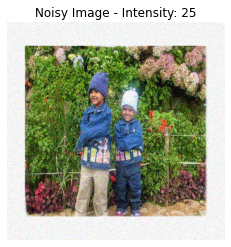

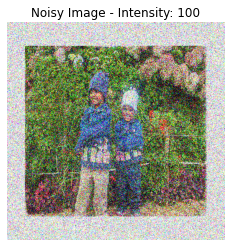

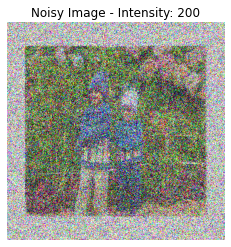

In [16]:
# Three different noise intensities
noise_intensities = [25,100,200]
noisy_images = [add_gausian_noise(img, intensity) for intensity in noise_intensities]

for i, intensity in enumerate(noise_intensities):
    plt.imshow(noisy_images[i])
    plt.title(f"Noisy Image - Intensity: {intensity}")
    plt.axis('off')
    plt.show()

## Gaussian Blur

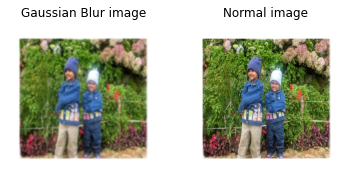

In [17]:
gau_image = cv2.GaussianBlur(img, (9, 9), 0)
# (9,9) -> kernel size

plt.subplot(1,2,1)
plt.imshow(gau_image)
plt.axis("off")
plt.title("Gaussian Blur image")

plt.subplot(1,2,2)
plt.imshow(img)
plt.axis("off")
plt.title("Normal image")

plt.show()

## Uniform noise

In [54]:
# uniform = np.random.uniform(0, 40, (r, c, d))
# noisy_image = np.clip(image + uniform, 0, 255)

# uniform_noise_image = noisy_image.astype(np.uint8)

# plt.imshow(uniform_noise_image)

## Salt and pepper noise

In [ ]:
# img = cv2.imread('Image_2.jpg', cv2.IMREAD_GRAYSCALE)

# row , col = img.shape 
# number_of_pixels = random.randint(1000, 10000) 
# for i in range(number_of_pixels):  
#     y_coord=random.randint(0, row - 1) 
#     x_coord=random.randint(0, col - 1) 
          
#     img[y_coord][x_coord] = 255
    
# number_of_pixels = random.randint(1000 , 10000) 
# for i in range(number_of_pixels): 
        
#     y_coord=random.randint(0, row - 1)  
#     x_coord=random.randint(0, col - 1) 
#     img[y_coord][x_coord] = 0
    
# plt.imshow(img,cmap="gray")

## Motion Blur

In [ ]:
# kernel_size = 30
# kernel = np.zeros((kernel_size, kernel_size))
# kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
# kernel /= kernel_size
# motion_blur = cv2.filter2D(img, -1, kernel)

# noisy_image = np.int32(motion_blur + 10 * np.random.randn(*motion_blur.shape))
# plt.imshow(noisy_image,cmap='gray')
# plt.title("MotionBlur + Noise")
# plt.axis("off")
# plt.show()

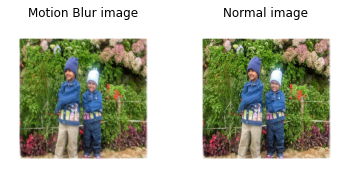

In [18]:
kernel = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]) / 3
motion_blurred_image = cv2.filter2D(img, -1, kernel)

plt.subplot(1,2,1)
plt.imshow(motion_blurred_image)
plt.axis("off")
plt.title("Motion Blur image")

plt.subplot(1,2,2)
plt.imshow(img)
plt.axis("off")
plt.title("Normal image")

plt.show()

## Defocus Blur

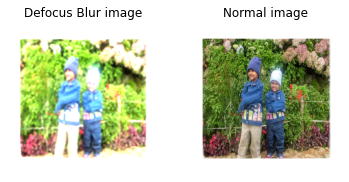

In [19]:
kernel = np.ones((7, 7), np.float32) / 25
defocus_blurred_image = cv2.filter2D(img, -1, kernel)

plt.subplot(1,2,1)
plt.imshow(defocus_blurred_image)
plt.axis("off")
plt.title("Defocus Blur image")

plt.subplot(1,2,2)
plt.imshow(img)
plt.axis("off")
plt.title("Normal image")

plt.show()

## Metrics

- PSNR (Peak Signal to Noise Ratio)
- SSIM( Structural Similarity Index Measure)
- LPIPS( Learned Perceptual Image Patch Similarity).

## PSNR , SSIM

In [20]:
# Noisy images
for i, intensity in enumerate(noise_intensities):
    psnr_value = psnr(img, noisy_images[i])
    (score, diff) = ssim(img, noisy_images[i], full=True, channel_axis=-1,multichannel=True)
    
    print(f"Noisy Image - Intensity: {intensity}")
    print(f"PSNR: {psnr_value:.2f}")
    print(f"SSIM: {score}")
    print()

Noisy Image - Intensity: 25
PSNR: 21.21
SSIM: 0.5352430991729215

Noisy Image - Intensity: 100
PSNR: 10.64
SSIM: 0.13361406357670233

Noisy Image - Intensity: 200
PSNR: 7.26
SSIM: 0.054945399582641156



In [21]:
# Blur images
images_blur_set = [gau_image,defocus_blurred_image,motion_blurred_image]
set_names = ['Gaussian Blur','Defocus Blur','Motion Blur']

for name,image in zip(set_names,images_blur_set):
    psnr_value = psnr(img, image)
    (score, diff) = ssim(img, image, full=True, channel_axis=-1,multichannel=True)
    
    print(f"{name}")
    print(f"PSNR: {psnr_value:.2f}")
    print(f"SSIM: {score}")
    print()

Gaussian Blur
PSNR: 22.67
SSIM: 0.6976088583892822

Defocus Blur
PSNR: 11.28
SSIM: 0.535617163990597

Motion Blur
PSNR: 25.06
SSIM: 0.8482829463668772



## LPIPS

In [22]:
# im = transforms.ToTensor()(img)
# loss_fn_lpips = lpips.LPIPS(net='alex')

# for i,image in enumerate(noise_intensities):
#     np_im = transforms.ToTensor()(noisy_images[i])
#     lpips_value = loss_fn_lpips(im,np_im).item()
    
#     print(f"Intensity: {noise_intensities[i]}")
#     print(f"LPIPS: {lpips_value:.4f}")
#     print()
    
# for name, image in zip(set_names, images_blur_set):
#     blur_im = transforms.ToTensor()(image)
#     lpips_value = loss_fn_lpips(im, blur_im).item()

#     print(f"{name}")
#     print(f"LPIPS: {lpips_value:.4f}")
#     print()

## Wiener Filter

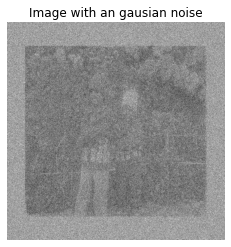

In [26]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
noisy_image = np.int32(img + 100 * np.random.randn(*img.shape))
plt.imshow(noisy_image,cmap='gray')
plt.axis('off')
plt.title("Image with an gausian noise")
plt.show()

In [27]:
denoise_img = signal.wiener(noisy_image, (5,5))
denoise_img

array([[ 97.23743992, 253.03169825, 253.18178091, ..., 307.06189051,
        249.28876535, 239.71525525],
       [208.55742205,  59.74035504, 164.33272455, ..., 223.62754527,
        287.21475351, 134.01984119],
       [247.75407014, 310.19124927, 191.3192389 , ..., 266.        ,
        215.27059722, 202.84437778],
       ...,
       [129.29975074, 230.82084701, 253.04      , ..., 246.2       ,
        197.53624148, 223.58583731],
       [162.1835147 , 273.82391432, 232.23415201, ..., 244.17142171,
        202.93706675, 188.49820403],
       [208.62320592, 127.4141099 , 169.63252025, ..., 236.16447621,
        191.52541284, 233.43326416]])

In [28]:
denoise_img = np.uint8(np.clip(denoise_img, 0, 255))
denoise_img

array([[ 97, 253, 253, ..., 255, 249, 239],
       [208,  59, 164, ..., 223, 255, 134],
       [247, 255, 191, ..., 255, 215, 202],
       ...,
       [129, 230, 253, ..., 246, 197, 223],
       [162, 255, 232, ..., 244, 202, 188],
       [208, 127, 169, ..., 236, 191, 233]], dtype=uint8)

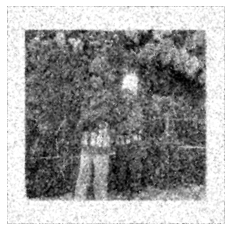

In [29]:
plt.imshow(denoise_img,cmap='gray')
plt.axis("off")
plt.show()

## Inference

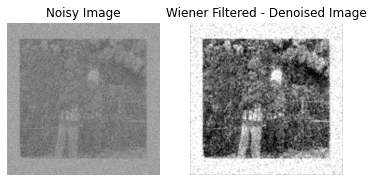

In [30]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(noisy_image,cmap='gray')
ax[0].set_title("Noisy Image")
ax[0].axis("off")
ax[1].imshow(denoise_img,cmap='gray')
ax[1].set_title("Wiener Filtered - Denoised Image")
ax[1].axis("off")
plt.show()

In [31]:
print(f"PSNR value: {cv2.PSNR(img, denoise_img)}")

PSNR value: 18.686110065466586


## MAP Estimation

In [35]:
noisy_image = np.int32(img + 100 * np.random.randn(*img.shape))
kerenel = np.ones((5,5)) / 25
kerenel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [36]:
def map_restore(g_img, kernel, nlevel, iters):
    f_img = g_img.copy()

    for _ in range(iters):
        blur_estimate = convolve2d(f_img, kernel, mode='same', boundary='wrap')
        data_likelihood = np.exp(-0.5 * ((g_img - blur_estimate) / nlevel) ** 2)
        prior_likelihood = np.ones_like(f_img)  # Uniform prior
        posterior = data_likelihood * prior_likelihood
        f_img = posterior / np.sum(posterior)

    return 1 - f_img

In [37]:
kernel = np.ones((5, 5)) / 25
f_estimate_1 = map_restore(noisy_image, kernel, 100, 100)

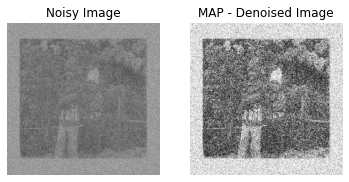

In [38]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(noisy_image,cmap='gray')
ax[0].set_title("Noisy Image")
ax[0].axis("off")
ax[1].imshow(f_estimate_1,cmap='gray')
ax[1].set_title("MAP - Denoised Image")
ax[1].axis("off")
plt.show()

## Deep Networks

In [39]:
# image = noisy_image
# image = tf.convert_to_tensor(noisy_image)
# image = tf.image.resize(noisy_image, (256, 256))
# image

In [40]:
# from huggingface_hub import from_pretrained_keras

In [41]:
# model = from_pretrained_keras("google/maxim-s3-denoising-sidd")
# predictions = model.predict(tf.expand_dims(image, 0))

In [42]:
# image_clipped = np.uint8(np.clip(predictions[0][0][0], 0, 255))
# plt.imshow(image_clipped,cmap='gray')

In [44]:
# url = "https://github.com/sayakpaul/maxim-tf/raw/main/images/Denoising/input/0011_23.png"
# image = Image.open(requests.get(url, stream=True).raw)
# image = np.array(image)
# image = tf.convert_to_tensor(image)
# image = tf.image.resize(image, (256, 256))

# model = from_pretrained_keras("google/maxim-s3-denoising-sidd")
# predictions = model.predict(tf.expand_dims(image, 0))

# plt.imshow(np.uint8(predictions[0][0][0]))

## Image Resizing

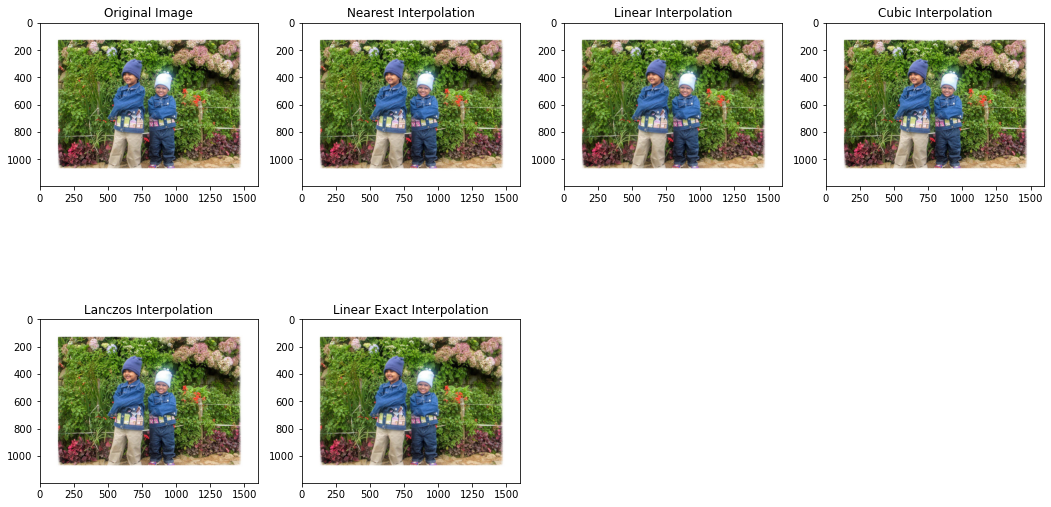

In [48]:
def resize_and_plot(image_path):

    img = cv2.imread(image_path, -1)
    h, w, c = img.shape

    img_n = cv2.resize(img, (w//2, h//2), interpolation=cv2.INTER_NEAREST)
    img_n = cv2.resize(img_n, (w, h), interpolation=cv2.INTER_NEAREST)

    img_b = cv2.resize(img, (w//2, h//2), interpolation=cv2.INTER_LINEAR)
    img_b = cv2.resize(img_b, (w, h), interpolation=cv2.INTER_LINEAR)


    img_c = cv2.resize(img, (w//2, h//2), interpolation=cv2.INTER_CUBIC)
    img_c = cv2.resize(img_c, (w, h), interpolation=cv2.INTER_CUBIC)

    img_l = cv2.resize(img, (w//2, h//2), interpolation=cv2.INTER_LANCZOS4)
    img_l = cv2.resize(img_l, (w, h), interpolation=cv2.INTER_LANCZOS4)

    img_s = cv2.resize(img, (w//2, h//2), interpolation=cv2.INTER_LINEAR_EXACT)
    img_s = cv2.resize(img_s, (w, h), interpolation=cv2.INTER_LINEAR_EXACT)

    plt.figure(figsize=(18, 10))

    plt.subplot(2, 4, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    plt.subplot(2, 4, 2)
    plt.imshow(cv2.cvtColor(img_n, cv2.COLOR_BGR2RGB))
    plt.title('Nearest Interpolation')

    plt.subplot(2, 4, 3)
    plt.imshow(cv2.cvtColor(img_b, cv2.COLOR_BGR2RGB))
    plt.title('Linear Interpolation')

    plt.subplot(2, 4, 4)
    plt.imshow(cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB))
    plt.title('Cubic Interpolation')

    plt.subplot(2, 4, 5)
    plt.imshow(cv2.cvtColor(img_l, cv2.COLOR_BGR2RGB))
    plt.title('Lanczos Interpolation')

    plt.subplot(2, 4, 6)
    plt.imshow(cv2.cvtColor(img_s, cv2.COLOR_BGR2RGB))
    plt.title('Linear Exact Interpolation')

    plt.show()

resize_and_plot("/Users/veda/Downloads/Veda_img.jpg")

## Image type conversion

In [49]:
def convert_image_format(input_path, output_path, output_format):
    img = Image.open(input_path)
    img.save(output_path, format=output_format)
    
def display_image(image_path):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [51]:
format_img = ['jpeg','png','gif','bmp']

input_path = "/Users/veda/Downloads/Veda_img.jpg"

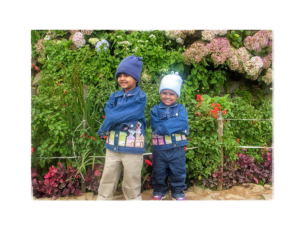

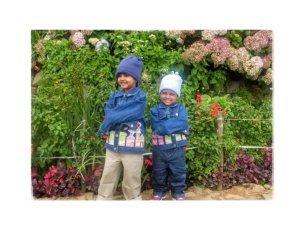

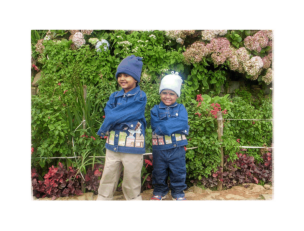

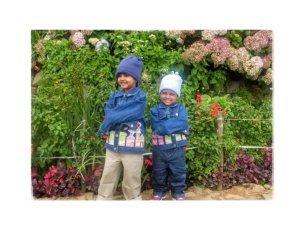

In [52]:
for i in format_img:
    output_path = f"Output{i}.{i}"
    convert_image_format(input_path,output_path,i)
    display_image(output_path)

## Extracting Color bands


Blue Channel: [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]

Red Channel: [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]

Green Channel: [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


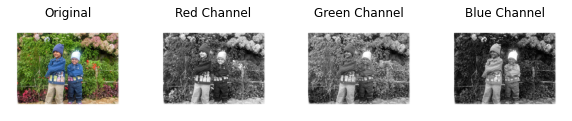

In [53]:
img = cv2.imread("/Users/veda/Downloads/Veda_img.jpg")

b, g, r = cv2.split(img)

print()
print(f"Blue Channel: {b}")
print()
print(f"Red Channel: {r}")
print()
print(f"Green Channel: {g}")


plt.figure(figsize=(10, 4))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(r, cmap='gray')
plt.title("Red Channel")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(g, cmap='gray')
plt.title("Green Channel")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(b, cmap='gray')
plt.title("Blue Channel")
plt.axis('off')

plt.show()

## Filtering

In [55]:
# def apply_smoothing(image, filter_type='gaussian', kernel_size=5):
#     if filter_type == 'gaussian':
#         return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
#     elif filter_type == 'median':
#         return cv2.medianBlur(image, kernel_size)
#     else:
#         raise ValueError("Invalid filter type.")
        
# smoothed_gaussian = apply_smoothing(gausian_image,filter_type="median")
# plt.imshow(smoothed_gaussian)

# smoothed_gaussian = apply_smoothing(gausian_image)
# plt.imshow(smoothed_gaussian)

# smoothed_uniform = apply_smoothing(uniform_noise_image)
# plt.imshow(smoothed_uniform)

# smoothed_uniform = apply_smoothing(uniform_noise_image,"median")
# plt.imshow(smoothed_uniform)

# smoothed_sanp = apply_smoothing(img)
# plt.imshow(smoothed_sanp,cmap='gray')

# smoothed_sanp = apply_smoothing(img,"median")
# plt.imshow(smoothed_sanp,cmap='gray')

## Contrast Stretching

In [56]:
# min_val = np.min(image)
# max_val = np.max(image)
# stretched_image = 255 * ((image - min_val) / (max_val - min_val))

# stretched_image = stretched_image.astype(np.uint8)
# plt.imshow(stretched_image,cmap='gray')

## Histogram Equalization

In [57]:
# image = cv2.imread('Image_1.jpg', cv2.IMREAD_GRAYSCALE)
# equalized_image = cv2.equalizeHist(image)

# plt.imshow(equalized_image,cmap='gray')

# plt.hist(image.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.5)
# plt.title('Original Image Histogram')
# plt.xlabel('Pixel Intensity')
# plt.ylabel('Frequency')

# plt.hist(equalized_image.ravel(), bins=256, range=[0, 256], color='red', alpha=0.5)
# plt.title('Equalized Image Histogram')
# plt.xlabel('Pixel Intensity')
# plt.ylabel('Frequency')

## Histogram

In [58]:
# histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
# plt.plot(histogram)
# plt.show()m

## Segmentation using Threshold setting

In [60]:
# _, threshold = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# plt.figure(figsize=(12, 4))

# plt.subplot(1, 2, 1)
# plt.imshow(image, cmap='gray')
# plt.title('Original Image')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(threshold, cmap='gray')
# plt.title('Thresholded Image')
# plt.axis('off')

# plt.show()

## Segmentation using adaptive threshold

we used one global value as a threshold. But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination

In [61]:
# adaptive_thresholded_image_gau = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# adaptive_thresholded_image_mean = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# plt.figure(figsize=(12, 4))

# plt.subplot(1, 3, 1)
# plt.imshow(image, cmap='gray')
# plt.title('Original Image')
# plt.axis('off')

# plt.subplot(1, 3, 2)
# plt.imshow(adaptive_thresholded_image_gau, cmap='gray')
# plt.title('Adaptive Gausian')
# plt.axis('off')

# plt.subplot(1, 3, 3)
# plt.imshow(adaptive_thresholded_image_mean, cmap='gray')
# plt.title('Adaptive Mean')
# plt.axis('off')

# plt.show()

## Segmentation using watershed

In [62]:
# _, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# #noise removal
# kernel = np.ones((3,3),np.uint8)
# opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# #sure background area
# sure_bg = cv2.dilate(opening,kernel,iterations=3)

# #finding sure foreground area
# dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
# _, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# #finding unknown region
# sure_fg = np.uint8(sure_fg)
# unknown = cv2.subtract(sure_bg,sure_fg)

# #marker labelling
# _, markers = cv2.connectedComponents(sure_fg)
# markers = markers+1
# markers[unknown==255] = 0

# #add 1 to all labels so that the sure background is not 0 but 1
# img = cv2.imread("1.jpeg")
# markers = cv2.watershed(img,markers)
# img[markers == -1] = [255,0,0]

# plt.figure(figsize=(12, 4))

# plt.subplot(1, 2, 1)
# plt.imshow(image, cmap='gray')
# plt.title('Original Image')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(img, cmap='gray')
# plt.title('watershed segmented Image')
# plt.axis('off')

# plt.show()

## Morphological Transformation

These operations are used in image processing to manipulate the shape of the objects within an image. 
Methods are erosion, dilation, opening, and closing.

1. **Erosion**: Erosion is a morphological operation that "erodes" away the boundaries of foreground objects in an image. It works by moving the structuring element over the image, and for each pixel under the structuring element, if all the pixels are nonzero, the pixel at the center of the structuring element is set to 1 (or white). Otherwise, it is set to 0 (or black).

2. **Dilation**: Dilation is the opposite of erosion. It "dilates" or expands the boundaries of foreground objects in an image. Like erosion, it also moves the structuring element over the image, but the central pixel is set to 1 if at least one pixel under the structuring element is nonzero.

3. **Opening**: Opening is a combination of erosion followed by dilation. It is useful for removing noise and small objects from an image while preserving the larger structures.

4. **Closing**: Closing is a combination of dilation followed by erosion. It is useful for closing small gaps between objects or filling in small holes within objects.

In [63]:
# # reading threshold image
# plt.imshow(threshold,cmap='gray')

# #kernel definition
# circular_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
# square_kernel = np.ones((5, 5), np.uint8)
# cross_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

# circular_kernel
# square_kernel
# cross_kernel

#### 1  erosion and dilation with a circular structuring element

In [65]:
# cirr_eroded = cv2.erode(threshold, circular_kernel, iterations=1)
# cirr_dilated = cv2.dilate(threshold, circular_kernel, iterations=1)

# plt.figure(figsize=(12, 4))

# plt.subplot(1, 2, 1)
# plt.imshow(cirr_eroded, cmap='gray')
# plt.title('Cir Eroded Image')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(cirr_dilated, cmap='gray')
# plt.title('Cir Dilated Image')
# plt.axis('off')

# plt.show()

#### 2 erosion and dilation with a square structuring element

In [66]:
# square_erd = cv2.erode(threshold, square_kernel, iterations=1)
# square_did = cv2.dilate(threshold, square_kernel, iterations=1)

# plt.figure(figsize=(12, 4))

# plt.subplot(1, 2, 1)
# plt.imshow(square_erd, cmap='gray')
# plt.title('Square Eroded Image')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(square_did, cmap='gray')
# plt.title('Square Dilated Image')
# plt.axis('off')

# plt.show()

#### 3 closing and opening with a cross shaped structuring element

In [67]:
# cross_closed = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, cross_kernel)
# cross_opened = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, cross_kernel)

# plt.figure(figsize=(12, 4))

# plt.subplot(1, 2, 1)
# plt.imshow(cross_closed, cmap='gray')
# plt.title('Cross Closed Image')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(cross_opened, cmap='gray')
# plt.title('Cross Opened Image')
# plt.axis('off')

# plt.show()

#### Mask from grey background to black background(untouching the white regirons)

In [68]:
# _, threshold = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# plt.imshow(threshold,cmap='gray')
# plt.title("Mask")
# plt.axis("off")
# plt.show()

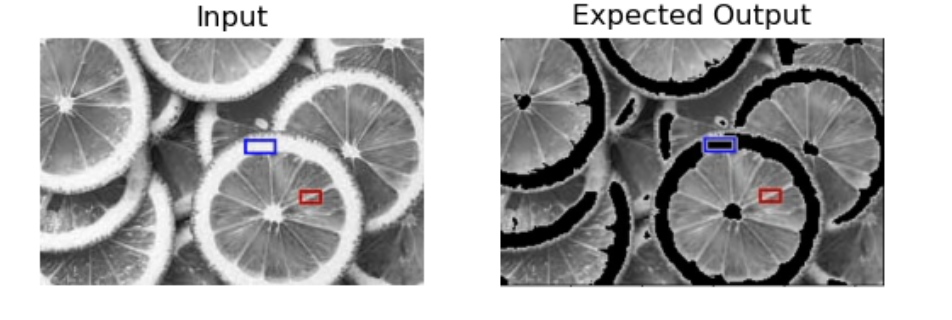

### HSV Conversion

In [69]:
# hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# hsv_img.shape

# plt.imshow(hsv_img)

### Creating mask

In [70]:
# lower_white_limit = np.array([0, 0, 200]) 
# upper_white_limit = np.array([180, 50, 255])

# mask = cv2.inRange(hsv_img, lower_white_limit, upper_white_limit)

# plt.imshow(mask,cmap='gray')

### Overlap images

In [71]:
# inverse_mask = 255 - mask
# outpyt_e_image = cv2.bitwise_and(img, img, mask=inverse_mask)
# plt.imshow(outpyt_e_image, cmap='gray')
# plt.axis("off")
# plt.show()

## CIFAR - 10

In [72]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline

# import tensorflow as tf
# from tensorflow.keras.datasets import cifar10
# from tensorflow.keras.utils import to_categorical

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import classification_report, confusion_matrix


# (X_train, y_train), (X_test, y_test) = cifar10.load_data()

# print(f"X_train shape: {X_train.shape}")
# print(f"y_train shape: {y_train.shape}")
# print(f"X_test shape: {X_test.shape}")
# print(f"y_test shape: {y_test.shape}")


# X_train = X_train / 255.0
# X_test = X_test / 255.0


# y_cat_train = to_categorical(y_train, 10)
# y_cat_test = to_categorical(y_test, 10)


# INPUT_SHAPE = (32, 32, 3)
# KERNEL_SIZE = (3, 3)
# model = Sequential()

# # Convolutional Layer
# model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
# model.add(BatchNormalization())
# # Pooling layer
# model.add(MaxPool2D(pool_size=(2, 2)))
# # Dropout layers
# model.add(Dropout(0.25))

# model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# # model.add(Dropout(0.2))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.25))
# model.add(Dense(10, activation='softmax'))

# METRICS = [
#     'accuracy',
#     tf.keras.metrics.Precision(name='precision'),
#     tf.keras.metrics.Recall(name='recall')
# ]
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)


# model.summary()


# early_stop = EarlyStopping(monitor='val_loss', patience=2)


# batch_size = 32
# data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
# steps_per_epoch = X_train.shape[0] // batch_size

# r = model.fit(train_generator,
#               epochs=10,
#               steps_per_epoch=steps_per_epoch,
#               validation_data=(X_test, y_cat_test)
#              )


# plt.figure(figsize=(12, 16))

# plt.subplot(4, 2, 1)
# plt.plot(r.history['loss'], label='Loss')
# plt.plot(r.history['val_loss'], label='val_Loss')
# plt.title('Loss Function Evolution')
# plt.legend()

# plt.subplot(4, 2, 2)
# plt.plot(r.history['accuracy'], label='accuracy')
# plt.plot(r.history['val_accuracy'], label='val_accuracy')
# plt.title('Accuracy Function Evolution')
# plt.legend()

# plt.subplot(4, 2, 3)
# plt.plot(r.history['precision'], label='precision')
# plt.plot(r.history['val_precision'], label='val_precision')
# plt.title('Precision Function Evolution')
# plt.legend()

# plt.subplot(4, 2, 4)
# plt.plot(r.history['recall'], label='recall')
# plt.plot(r.history['val_recall'], label='val_recall')
# plt.title('Recall Function Evolution')
# plt.legend()


# labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
#           'dog', 'frog', 'horse', 'ship', 'truck']


# evaluation = model.evaluate(X_test, y_cat_test)
# print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

# y_pred = model.predict(X_test)
# y_pred = np.argmax(y_pred, axis=1)
# cm = confusion_matrix(y_test, y_pred)


# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                               display_labels=labels)


# fig, ax = plt.subplots(figsize=(10, 10))
# disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

# plt.show()


# print(classification_report(y_test, y_pred))


# my_image = X_test[10]
# plt.imshow(my_image)

# print(f" Image: {y_test[10]}")
# pred_100 = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
# print(f"The model predict that image is {labels[pred_100]}")

## BraTS

In [ ]:
# !pip install nilearn
# !pip install nibabel
# !pip install imageio==2.27.0


# import os
# import cv2
# import glob
# import PIL
# import shutil
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from skimage import data
# from skimage.util import montage 
# import skimage.transform as skTrans
# from skimage.transform import rotate
# from skimage.transform import resize
# from PIL import Image, ImageOps  
# import nilearn as nl
# import nibabel as nib
# import nilearn.plotting as nlplt
# import keras
# import keras.backend as K
# from keras.callbacks import CSVLogger
# import tensorflow as tf
# from tensorflow.keras.utils import plot_model
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from tensorflow.keras.models import *
# from tensorflow.keras.layers import *
# from tensorflow.keras.optimizers import *
# from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard
# from tensorflow.keras import preprocessing


# # DEFINE seg-areas  
# SEGMENT_CLASSES = {
#     0 : 'NOT tumor',
#     1 : 'NECROTIC/CORE', # or NON-ENHANCING tumor CORE
#     2 : 'EDEMA',
#     3 : 'ENHANCING' # original 4 -> converted into 3 later
# }

# # there are 155 slices per volume
# # to start at 5 and use 145 slices means we will skip the first 5 and last 5 
# VOLUME_SLICES = 100 
# VOLUME_START_AT = 22 # first slice of volume that we will include


# TRAIN_DATASET_PATH = '../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'
# VALIDATION_DATASET_PATH = '../input/brats20-dataset-training-validation/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData'

# test_image_flair=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_001/BraTS20_Training_001_flair.nii').get_fdata()
# test_image_t1=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_001/BraTS20_Training_001_t1.nii').get_fdata()
# test_image_t1ce=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_001/BraTS20_Training_001_t1ce.nii').get_fdata()
# test_image_t2=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_001/BraTS20_Training_001_t2.nii').get_fdata()
# test_mask=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_001/BraTS20_Training_001_seg.nii').get_fdata()


# fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20, 10))
# slice_w = 25
# ax1.imshow(test_image_flair[:,:,test_image_flair.shape[0]//2-slice_w], cmap = 'gray')
# ax1.set_title('Image flair')
# ax2.imshow(test_image_t1[:,:,test_image_t1.shape[0]//2-slice_w], cmap = 'gray')
# ax2.set_title('Image t1')
# ax3.imshow(test_image_t1ce[:,:,test_image_t1ce.shape[0]//2-slice_w], cmap = 'gray')
# ax3.set_title('Image t1ce')
# ax4.imshow(test_image_t2[:,:,test_image_t2.shape[0]//2-slice_w], cmap = 'gray')
# ax4.set_title('Image t2')
# ax5.imshow(test_mask[:,:,test_mask.shape[0]//2-slice_w])
# ax5.set_title('Mask')



# # dice loss as defined above for 4 classes
# def dice_coef(y_true, y_pred, smooth=1.0):
#     class_num = 4
#     for i in range(class_num):
#         y_true_f = K.flatten(y_true[:,:,:,i])
#         y_pred_f = K.flatten(y_pred[:,:,:,i])
#         intersection = K.sum(y_true_f * y_pred_f)
#         loss = ((2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth))
#    #     K.print_tensor(loss, message='loss value for class {} : '.format(SEGMENT_CLASSES[i]))
#         if i == 0:
#             total_loss = loss
#         else:
#             total_loss = total_loss + loss
#     total_loss = total_loss / class_num
# #    K.print_tensor(total_loss, message=' total dice coef: ')
#     return total_loss

# def dice_coef_necrotic(y_true, y_pred, epsilon=1e-6):
#     intersection = K.sum(K.abs(y_true[:,:,:,1] * y_pred[:,:,:,1]))
#     return (2. * intersection) / (K.sum(K.square(y_true[:,:,:,1])) + K.sum(K.square(y_pred[:,:,:,1])) + epsilon)

# def dice_coef_edema(y_true, y_pred, epsilon=1e-6):
#     intersection = K.sum(K.abs(y_true[:,:,:,2] * y_pred[:,:,:,2]))
#     return (2. * intersection) / (K.sum(K.square(y_true[:,:,:,2])) + K.sum(K.square(y_pred[:,:,:,2])) + epsilon)

# def dice_coef_enhancing(y_true, y_pred, epsilon=1e-6):
#     intersection = K.sum(K.abs(y_true[:,:,:,3] * y_pred[:,:,:,3]))
#     return (2. * intersection) / (K.sum(K.square(y_true[:,:,:,3])) + K.sum(K.square(y_pred[:,:,:,3])) + epsilon)



# # Computing Precision 
# def precision(y_true, y_pred):
#         true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#         predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#         precision = true_positives / (predicted_positives + K.epsilon())
#         return precision

    
# # Computing Sensitivity      
# def sensitivity(y_true, y_pred):
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#     return true_positives / (possible_positives + K.epsilon())


# # Computing Specificity
# def specificity(y_true, y_pred):
#     true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
#     possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
#     return true_negatives / (possible_negatives + K.epsilon())


# IMG_SIZE=128


# def build_unet(inputs, ker_init, dropout):
#     conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(inputs)
#     conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv1)
    
#     pool = MaxPooling2D(pool_size=(2, 2))(conv1)
#     conv = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool)
#     conv = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv)
    
#     pool1 = MaxPooling2D(pool_size=(2, 2))(conv)
#     conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool1)
#     conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv2)
    
#     pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
#     conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool2)
#     conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv3)
    
    
#     pool4 = MaxPooling2D(pool_size=(2, 2))(conv3)
#     conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool4)
#     conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv5)
#     drop5 = Dropout(dropout)(conv5)

#     up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = (2,2))(drop5))
#     merge7 = concatenate([conv3,up7], axis = 3)
#     conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge7)
#     conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv7)

#     up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = (2,2))(conv7))
#     merge8 = concatenate([conv2,up8], axis = 3)
#     conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge8)
#     conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv8)

#     up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = (2,2))(conv8))
#     merge9 = concatenate([conv,up9], axis = 3)
#     conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge9)
#     conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv9)
    
#     up = Conv2D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = (2,2))(conv9))
#     merge = concatenate([conv1,up], axis = 3)
#     conv = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge)
#     conv = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv)
    
#     conv10 = Conv2D(4, (1,1), activation = 'softmax')(conv)
    
#     return Model(inputs = inputs, outputs = conv10)

# input_layer = Input((IMG_SIZE, IMG_SIZE, 2))

# model = build_unet(input_layer, 'he_normal', 0.2)
# model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics = ['accuracy',tf.keras.metrics.MeanIoU(num_classes=4), dice_coef, precision, sensitivity, specificity, dice_coef_necrotic, dice_coef_edema ,dice_coef_enhancing] )


# plot_model(model, 
#            show_shapes = True,
#            show_dtype=False,
#            show_layer_names = True, 
#            rankdir = 'TB', 
#            expand_nested = False, 
#            dpi = 70)


# # lists of directories with studies
# train_and_val_directories = [f.path for f in os.scandir(TRAIN_DATASET_PATH) if f.is_dir()]

# # file BraTS20_Training_355 has ill formatted name for for seg.nii file
# train_and_val_directories.remove(TRAIN_DATASET_PATH+'BraTS20_Training_355')


# def pathListIntoIds(dirList):
#     x = []
#     for i in range(0,len(dirList)):
#         x.append(dirList[i][dirList[i].rfind('/')+1:])
#     return x

# train_and_test_ids = pathListIntoIds(train_and_val_directories); 

    
# train_test_ids, val_ids = train_test_split(train_and_test_ids,test_size=0.2) 
# train_ids, test_ids = train_test_split(train_test_ids,test_size=0.15) 


# class DataGenerator(keras.utils.Sequence):
#     'Generates data for Keras'
#     def __init__(self, list_IDs, dim=(IMG_SIZE,IMG_SIZE), batch_size = 1, n_channels = 2, shuffle=True):
#         'Initialization'
#         self.dim = dim
#         self.batch_size = batch_size
#         self.list_IDs = list_IDs
#         self.n_channels = n_channels
#         self.shuffle = shuffle
#         self.on_epoch_end()

#     def __len__(self):
#         'Denotes the number of batches per epoch'
#         return int(np.floor(len(self.list_IDs) / self.batch_size))

#     def __getitem__(self, index):
#         'Generate one batch of data'
#         # Generate indexes of the batch
#         indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

#         # Find list of IDs
#         Batch_ids = [self.list_IDs[k] for k in indexes]

#         # Generate data
#         X, y = self.__data_generation(Batch_ids)

#         return X, y

#     def on_epoch_end(self):
#         'Updates indexes after each epoch'
#         self.indexes = np.arange(len(self.list_IDs))
#         if self.shuffle == True:
#             np.random.shuffle(self.indexes)

#     def __data_generation(self, Batch_ids):
#         'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
#         # Initialization
#         X = np.zeros((self.batch_size*VOLUME_SLICES, *self.dim, self.n_channels))
#         y = np.zeros((self.batch_size*VOLUME_SLICES, 240, 240))
#         Y = np.zeros((self.batch_size*VOLUME_SLICES, *self.dim, 4))

        
#         # Generate data
#         for c, i in enumerate(Batch_ids):
#             case_path = os.path.join(TRAIN_DATASET_PATH, i)

#             data_path = os.path.join(case_path, f'{i}_flair.nii');
#             flair = nib.load(data_path).get_fdata()    

#             data_path = os.path.join(case_path, f'{i}_t1ce.nii');
#             ce = nib.load(data_path).get_fdata()
            
#             data_path = os.path.join(case_path, f'{i}_seg.nii');
#             seg = nib.load(data_path).get_fdata()
        
#             for j in range(VOLUME_SLICES):
#                  X[j +VOLUME_SLICES*c,:,:,0] = cv2.resize(flair[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE));
#                  X[j +VOLUME_SLICES*c,:,:,1] = cv2.resize(ce[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE));

#                  y[j +VOLUME_SLICES*c] = seg[:,:,j+VOLUME_START_AT];
                    
#         # Generate masks
#         y[y==4] = 3;
#         mask = tf.one_hot(y, 4);
#         Y = tf.image.resize(mask, (IMG_SIZE, IMG_SIZE));
#         return X/np.max(X), Y
        
# training_generator = DataGenerator(train_ids)
# valid_generator = DataGenerator(val_ids)
# test_generator = DataGenerator(test_ids)


# csv_logger = CSVLogger('training.log', separator=',', append=False)


# callbacks = [
# #     keras.callbacks.EarlyStopping(monitor='loss', min_delta=0,
# #                               patience=2, verbose=1, mode='auto'),
#       keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                               patience=2, min_lr=0.000001, verbose=1),
# #  keras.callbacks.ModelCheckpoint(filepath = 'model_.{epoch:02d}-{val_loss:.6f}.m5',
# #                             verbose=1, save_best_only=True, save_weights_only = True)
#         csv_logger
#     ]


# K.clear_session()

# history =  model.fit(training_generator,
#                      epochs=35,
#                      steps_per_epoch=len(train_ids),
#                      callbacks= callbacks,
#                      validation_data = valid_generator
#                      )  
# model.save("model_x1_1.h5")


# ############ load trained model ################
# model = keras.models.load_model('../input/modelperclasseval/model_per_class.h5', 
#                                    custom_objects={ 'accuracy' : tf.keras.metrics.MeanIoU(num_classes=4),
#                                                    "dice_coef": dice_coef,
#                                                    "precision": precision,
#                                                    "sensitivity":sensitivity,
#                                                    "specificity":specificity,
#                                                    "dice_coef_necrotic": dice_coef_necrotic,
#                                                    "dice_coef_edema": dice_coef_edema,
#                                                    "dice_coef_enhancing": dice_coef_enhancing
#                                                   }, compile=False)

# history = pd.read_csv('../input/modelperclasseval/training_per_class.log', sep=',', engine='python')

# hist=history

# ############### ########## ####### #######

# # hist=history.history

# acc=hist['accuracy']
# val_acc=hist['val_accuracy']

# epoch=range(len(acc))

# loss=hist['loss']
# val_loss=hist['val_loss']

# train_dice=hist['dice_coef']
# val_dice=hist['val_dice_coef']

# f,ax=plt.subplots(1,4,figsize=(16,8))

# ax[0].plot(epoch,acc,'b',label='Training Accuracy')
# ax[0].plot(epoch,val_acc,'r',label='Validation Accuracy')
# ax[0].legend()

# ax[1].plot(epoch,loss,'b',label='Training Loss')
# ax[1].plot(epoch,val_loss,'r',label='Validation Loss')
# ax[1].legend()

# ax[2].plot(epoch,train_dice,'b',label='Training dice coef')
# ax[2].plot(epoch,val_dice,'r',label='Validation dice coef')
# ax[2].legend()

# ax[3].plot(epoch,hist['mean_io_u'],'b',label='Training mean IOU')
# ax[3].plot(epoch,hist['val_mean_io_u'],'r',label='Validation mean IOU')
# ax[3].legend()

# plt.show()


# def imageLoader(path):
#     image = nib.load(path).get_fdata()
#     X = np.zeros((self.batch_size*VOLUME_SLICES, *self.dim, self.n_channels))
#     for j in range(VOLUME_SLICES):
#         X[j +VOLUME_SLICES*c,:,:,0] = cv2.resize(image[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE));
#         X[j +VOLUME_SLICES*c,:,:,1] = cv2.resize(ce[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE));

#         y[j +VOLUME_SLICES*c] = seg[:,:,j+VOLUME_START_AT];
#     return np.array(image)

# def loadDataFromDir(path, list_of_files, mriType, n_images):
#     scans = []
#     masks = []
#     for i in list_of_files[:n_images]:
#         fullPath = glob.glob( i + '/*'+ mriType +'*')[0]
#         currentScanVolume = imageLoader(fullPath)
#         currentMaskVolume = imageLoader( glob.glob( i + '/*seg*')[0] ) 
#         # for each slice in 3D volume, find also it's mask
#         for j in range(0, currentScanVolume.shape[2]):
#             scan_img = cv2.resize(currentScanVolume[:,:,j], dsize=(IMG_SIZE,IMG_SIZE), interpolation=cv2.INTER_AREA).astype('uint8')
#             mask_img = cv2.resize(currentMaskVolume[:,:,j], dsize=(IMG_SIZE,IMG_SIZE), interpolation=cv2.INTER_AREA).astype('uint8')
#             scans.append(scan_img[..., np.newaxis])
#             masks.append(mask_img[..., np.newaxis])
#     return np.array(scans, dtype='float32'), np.array(masks, dtype='float32')
        
# #brains_list_test, masks_list_test = loadDataFromDir(VALIDATION_DATASET_PATH, test_directories, "flair", 5)



# def predictByPath(case_path,case):
#     files = next(os.walk(case_path))[2]
#     X = np.empty((VOLUME_SLICES, IMG_SIZE, IMG_SIZE, 2))
#   #  y = np.empty((VOLUME_SLICES, IMG_SIZE, IMG_SIZE))
    
#     vol_path = os.path.join(case_path, f'BraTS20_Training_{case}_flair.nii');
#     flair=nib.load(vol_path).get_fdata()
    
#     vol_path = os.path.join(case_path, f'BraTS20_Training_{case}_t1ce.nii');
#     ce=nib.load(vol_path).get_fdata() 
    
#  #   vol_path = os.path.join(case_path, f'BraTS20_Training_{case}_seg.nii');
#  #   seg=nib.load(vol_path).get_fdata()  

    
#     for j in range(VOLUME_SLICES):
#         X[j,:,:,0] = cv2.resize(flair[:,:,j+VOLUME_START_AT], (IMG_SIZE,IMG_SIZE))
#         X[j,:,:,1] = cv2.resize(ce[:,:,j+VOLUME_START_AT], (IMG_SIZE,IMG_SIZE))
#  #       y[j,:,:] = cv2.resize(seg[:,:,j+VOLUME_START_AT], (IMG_SIZE,IMG_SIZE))
        
#   #  model.evaluate(x=X,y=y[:,:,:,0], callbacks= callbacks)
#     return model.predict(X/np.max(X), verbose=1)


# def showPredictsById(case, start_slice = 60):
#     path = f"../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_{case}"
#     gt = nib.load(os.path.join(path, f'BraTS20_Training_{case}_seg.nii')).get_fdata()
#     origImage = nib.load(os.path.join(path, f'BraTS20_Training_{case}_flair.nii')).get_fdata()
#     p = predictByPath(path,case)

#     core = p[:,:,:,1]
#     edema= p[:,:,:,2]
#     enhancing = p[:,:,:,3]

#     plt.figure(figsize=(18, 50))
#     f, axarr = plt.subplots(1,6, figsize = (18, 50)) 

#     for i in range(6): # for each image, add brain background
#         axarr[i].imshow(cv2.resize(origImage[:,:,start_slice+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE)), cmap="gray", interpolation='none')
    
#     axarr[0].imshow(cv2.resize(origImage[:,:,start_slice+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE)), cmap="gray")
#     axarr[0].title.set_text('Original image flair')
#     curr_gt=cv2.resize(gt[:,:,start_slice+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE), interpolation = cv2.INTER_NEAREST)
#     axarr[1].imshow(curr_gt, cmap="Reds", interpolation='none', alpha=0.3) # ,alpha=0.3,cmap='Reds'
#     axarr[1].title.set_text('Ground truth')
#     axarr[2].imshow(p[start_slice,:,:,1:4], cmap="Reds", interpolation='none', alpha=0.3)
#     axarr[2].title.set_text('all classes')
#     axarr[3].imshow(edema[start_slice,:,:], cmap="OrRd", interpolation='none', alpha=0.3)
#     axarr[3].title.set_text(f'{SEGMENT_CLASSES[1]} predicted')
#     axarr[4].imshow(core[start_slice,:,], cmap="OrRd", interpolation='none', alpha=0.3)
#     axarr[4].title.set_text(f'{SEGMENT_CLASSES[2]} predicted')
#     axarr[5].imshow(enhancing[start_slice,:,], cmap="OrRd", interpolation='none', alpha=0.3)
#     axarr[5].title.set_text(f'{SEGMENT_CLASSES[3]} predicted')
#     plt.show()
    
    
# showPredictsById(case=test_ids[0][-3:])
# showPredictsById(case=test_ids[1][-3:])
# showPredictsById(case=test_ids[2][-3:])
# showPredictsById(case=test_ids[3][-3:])
# showPredictsById(case=test_ids[4][-3:])
# showPredictsById(case=test_ids[5][-3:])
# showPredictsById(case=test_ids[6][-3:])


# model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics = ['accuracy',tf.keras.metrics.MeanIoU(num_classes=4), dice_coef, precision, sensitivity, specificity, dice_coef_necrotic, dice_coef_edema, dice_coef_enhancing] )
# print("Evaluate on test data")
# results = model.evaluate(test_generator, batch_size=100, callbacks= callbacks)
# print("test loss, test acc:", results)